<a href="https://colab.research.google.com/github/devbratsrivastava/code/blob/master/DiabetesPredictionLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
# using joblib to save our model
!pip install joblib

using pandas to read data from csv file and manipulating

using numpy to convert the data to suitable format

using seaborn and matplotlib for visualization

using sklearn to import LOGISTIC REGERESSION ALGORITHM

using joblib to save our model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
import joblib

**Data discription**

using diabetes.csv file

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# converting csv file to dataframe
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


insuring the data is clean

In [ ]:
#printing info i.e. no. of columns,column labels,column data types,memory usage,range index,and the number of cells in each column (non-null values)
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data exploration**

Finding correlation of every pair of features and visualize the correlations using a heatmap.

Bright colors show more correlation

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


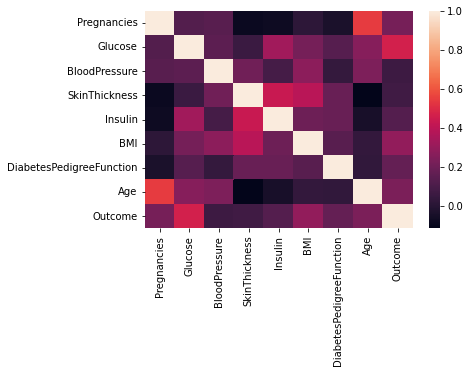

In [ ]:
corr = diabetesDF.corr() #find the pairwise correlation of all columns in the dataframe.
print(corr)
# using heatmap containing values representing various shades of the same colour for each value to be plotted
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

**Data preparation**

Splitting and normalizing the data

Dividing data into 3 parts

767= 650 train records + 100 test set + 17 set to cross model

In [ ]:
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

seperating labels and features and converting them to numpy

In [ ]:
#converting inputs to an array
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop(columns='Outcome')) #drop specified labels from rows or columns.
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop(columns='Outcome'))   #drop specified labels from rows or columns.

**Normalization**

Normalizing our inputs

In [ ]:
means = np.mean(trainData, axis=0)  # mean of a numpy array
stds = np.std(trainData, axis=0)    # compute the standard deviation along the specified axis
trainData = (trainData - means)/stds
testData = (testData - means)/stds
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

**Training and Evaluating Machine Learning Model**

**Using Logistic Regression**

In [ ]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

Test data to find out accuracy of the model.

In [ ]:
accuracy = diabetesCheck.score(testData, testLabel)  #Returning the coefficient of determination R^2 of the prediction
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


**Interpreting the ML Model**

Visualizing the model

Text(0.5, 0, 'Importance')

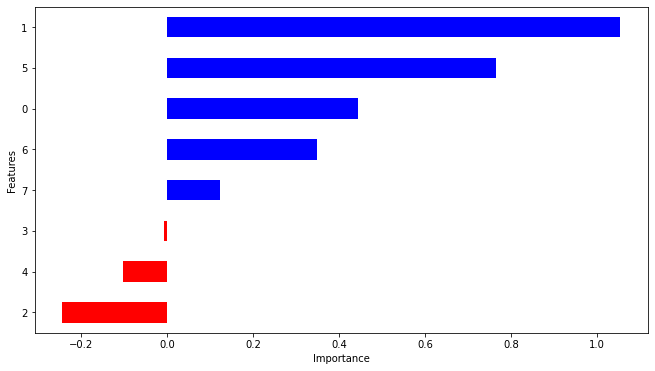

In [ ]:
coeff = list(diabetesCheck.coef_[0])   #creating list object
#labels = list(trainData.columns)
trainLIST= list(trainData)             #creating list object
df = pd.DataFrame(trainLIST) 
labels = df.columns
features = pd.DataFrame()              #creating dataframe
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)   #sorting the dataframe
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)    # setting a List, Series or Data frame as index of a Data Frame
# .plot() draw points (markers) in a diagram
# .map processes and transform all the items in an iterable without using an explicit for loop
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))  
plt.xlabel('Importance')

Higher blood pressure is correlated with a person not being diabetic

The model relies more on BMI

Saving the Model using joblib

In [ ]:
#  .dump() is used when objects are required to be in string format and is used for parsing, printing, etc

# a file created by pickle, a Python module that enabless objects to be serialized to files on disk and deserialized back into the program at runtime. 
# It contains a byte stream that represents the objects.
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')


['diabeteseModel.pkl']

Using test data to check the accuracy of saved model

In [ ]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl') #reads the pickled byte stream of python objects from a file object
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


Making Predictions with the model


In [ ]:
print(dfCheck.head())


     Pregnancies  Glucose  ...  Age  Outcome
750            4      136  ...   22        1
751            1      121  ...   28        0
752            3      108  ...   25        0
753            0      181  ...   26        1
754            8      154  ...   45        1

[5 rows x 9 columns]


In [ ]:
sampleData = dfCheck[:1]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures) #accepts single argument and returns an array of lists probabilities .
prediction = diabetesLoadedModel.predict(sampleDataFeatures) #predict the labels of the data values on the basis of the trained model.
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]]
prediction: [1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
